In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.models import Sequential
import math
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sn

In [13]:
#Carga de datos de mnist (set de entrenamiento y de pruebas)
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

#Etiquetas
class_names = metadata.features['label'].names

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [14]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
input_shape = (28, 28, 1)

In [15]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

In [16]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


In [17]:
##buffer para mantener los datos en la memoria para un rendimiento más rápido
#AUTOTUNE = tf.data.AUTOTUNE
#train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

#buffer para mantener los datos en la memoria para un rendimiento más rápido
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

In [18]:
model = Sequential()
#Capa convolucional de 32
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape, activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Capa convolucional de 64
model.add(Conv2D(64, kernel_size=(3,3), activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=100, activation=tf.nn.relu))
model.add(Dense(units=10,activation=tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [19]:
#Indicar las funciones a utilizar
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [20]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [ ]:
#Realizar el entrenamiento

model.fit(train_dataset,epochs=25,batch_size=BATCHSIZE,steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE))
#guardar----
model_name = 'red_ferney.h5'
model.save(model_name, save_format='h5')

Epoch 1/25
1875/1875 [==============================] - 76s 35ms/step - loss: 0.1403 - sparse_categorical_accuracy: 0.9582
Epoch 2/25
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9845
Epoch 3/25
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9898
Epoch 4/25
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0284 - sparse_categorical_accuracy: 0.9911
Epoch 5/25
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.9929
Epoch 6/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0171 - sparse_categorical_accuracy: 0.9945
Epoch 7/25
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0146 - sparse_categorical_accuracy: 0.9950
Epoch 8/25
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0130 - sparse_categorical_accuracy: 0.9956
Epoch 9/25
1875/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
#cargar el archivo h5
model_name = 'red_ferney.h5'
loaded_model = tf.keras.models.load_model(model_name)
# Re-evaluar el modelo
loaded_model.load_weights(model_name)
# ver descripcion...
loaded_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_27 (Dropout)        (None, 5, 5, 64)          0         
                                                                 
 flatten_27 (Flatten)        (None, 1600)            

In [24]:

print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


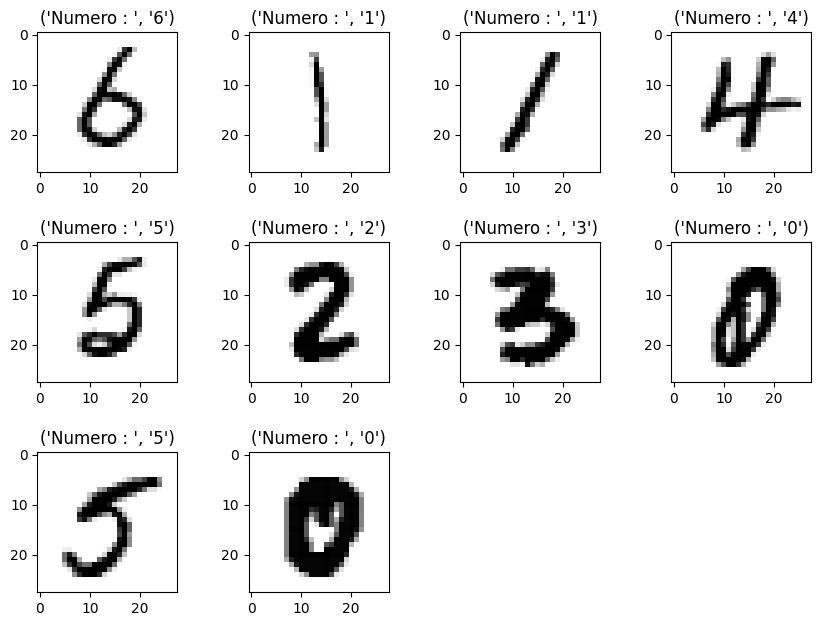

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(10):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("float32"),cmap='binary')
    f='Numero : ',format(class_names[labels[i]])
    plt.title(f)
    plt.axis("on")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [29]:
def draw(a):
  for images, labels in train_dataset.take(1):

      ax = plt.subplot(4, 4, a + 1)
      plt.imshow(images[a].numpy().astype("float32"),cmap='binary')
      f='Numero : ',format(class_names[labels[i]])
      plt.title(f)
      plt.axis("on")
  plt.show()

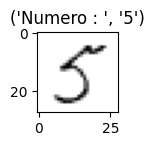

In [68]:
draw(6)